In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import ipywidgets as widgets
from IPython.display import display


In [2]:
import sys
import os

# Add the 'project' directory to the path
sys.path.append(os.path.abspath('..'))


from project_code.data.load_data import load_col_types

In [3]:
dataset_folder = '../data/processed'
dataset_name = 'no_pub_weight'
df = pd.read_csv(f"{dataset_folder}/{dataset_name}/no_dummies.csv", index_col=0)
df['model'] = df.apply(lambda row: 'stx' if row['weaning'] else ('abj' if row['metamorphosis'] else 'std'), axis=1)
df

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,Lp,Li,d_V,Ri,T_typical,t_0,model,metamorphosis,weaning,foetus
species,,,,,,,,,,,,,,,,,,,,,
Abramis_brama,401.09210,0.66367,0.016416,23.3484,5228.964,4.116000e-08,5.484000e-01,0.548500,NaN,236600.0000,...,27.00,72.0,0.20,2271.399000,291.15,NaN,abj,True,False,False
Achoerodus_viridis,148.17940,0.52154,0.099329,5.6975,5238.883,2.801000e-10,3.065000e-01,0.306600,NaN,310500.0000,...,20.00,72.0,0.20,9589.041000,293.15,NaN,abj,True,False,False
Actinonaias_ligamentina,35.95064,0.98335,0.003881,14.8638,2354.299,9.080000e-10,3.811000e-06,0.000009,NaN,57.6300,...,5.85,18.4,0.09,2663.704000,288.15,7.9854,abj,True,False,False
Aegopinella_epipedostoma,27.32214,0.96917,0.012099,154.0150,3917.341,2.736000e-07,5.540000e-02,1.641000,NaN,23.0500,...,NaN,1.1,0.15,0.045428,294.65,0.0000,abj,True,False,False
Aequipecten_opercularis,14.74086,0.99997,0.016669,38.7875,2347.980,3.605000e-08,9.004000e-09,0.000012,NaN,0.6447,...,NaN,9.0,0.09,6270.305000,283.15,NaN,abj,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,1090.39500,0.94062,0.042551,592.3464,7318.401,2.015000e-12,4.647000e+02,NaN,2324.0,5827.0000,...,NaN,NaN,0.28,0.135166,314.75,NaN,std,False,False,False
Zonotrichia_querula,1476.81700,0.97417,0.041453,834.8830,7333.113,3.237000e-12,1.888000e+02,NaN,817.4,2151.0000,...,NaN,NaN,0.28,0.090110,314.75,NaN,std,False,False,False
Zootoca_vivipara,516.24300,0.72515,0.023765,344.4866,7837.059,1.533000e-07,2.264000e+02,NaN,NaN,6375.0000,...,5.00,7.0,0.30,0.018635,286.85,NaN,std,False,False,False


In [4]:
col_types = load_col_types(dataset_name=dataset_name, dataset_folder=dataset_folder)

# Input visualization

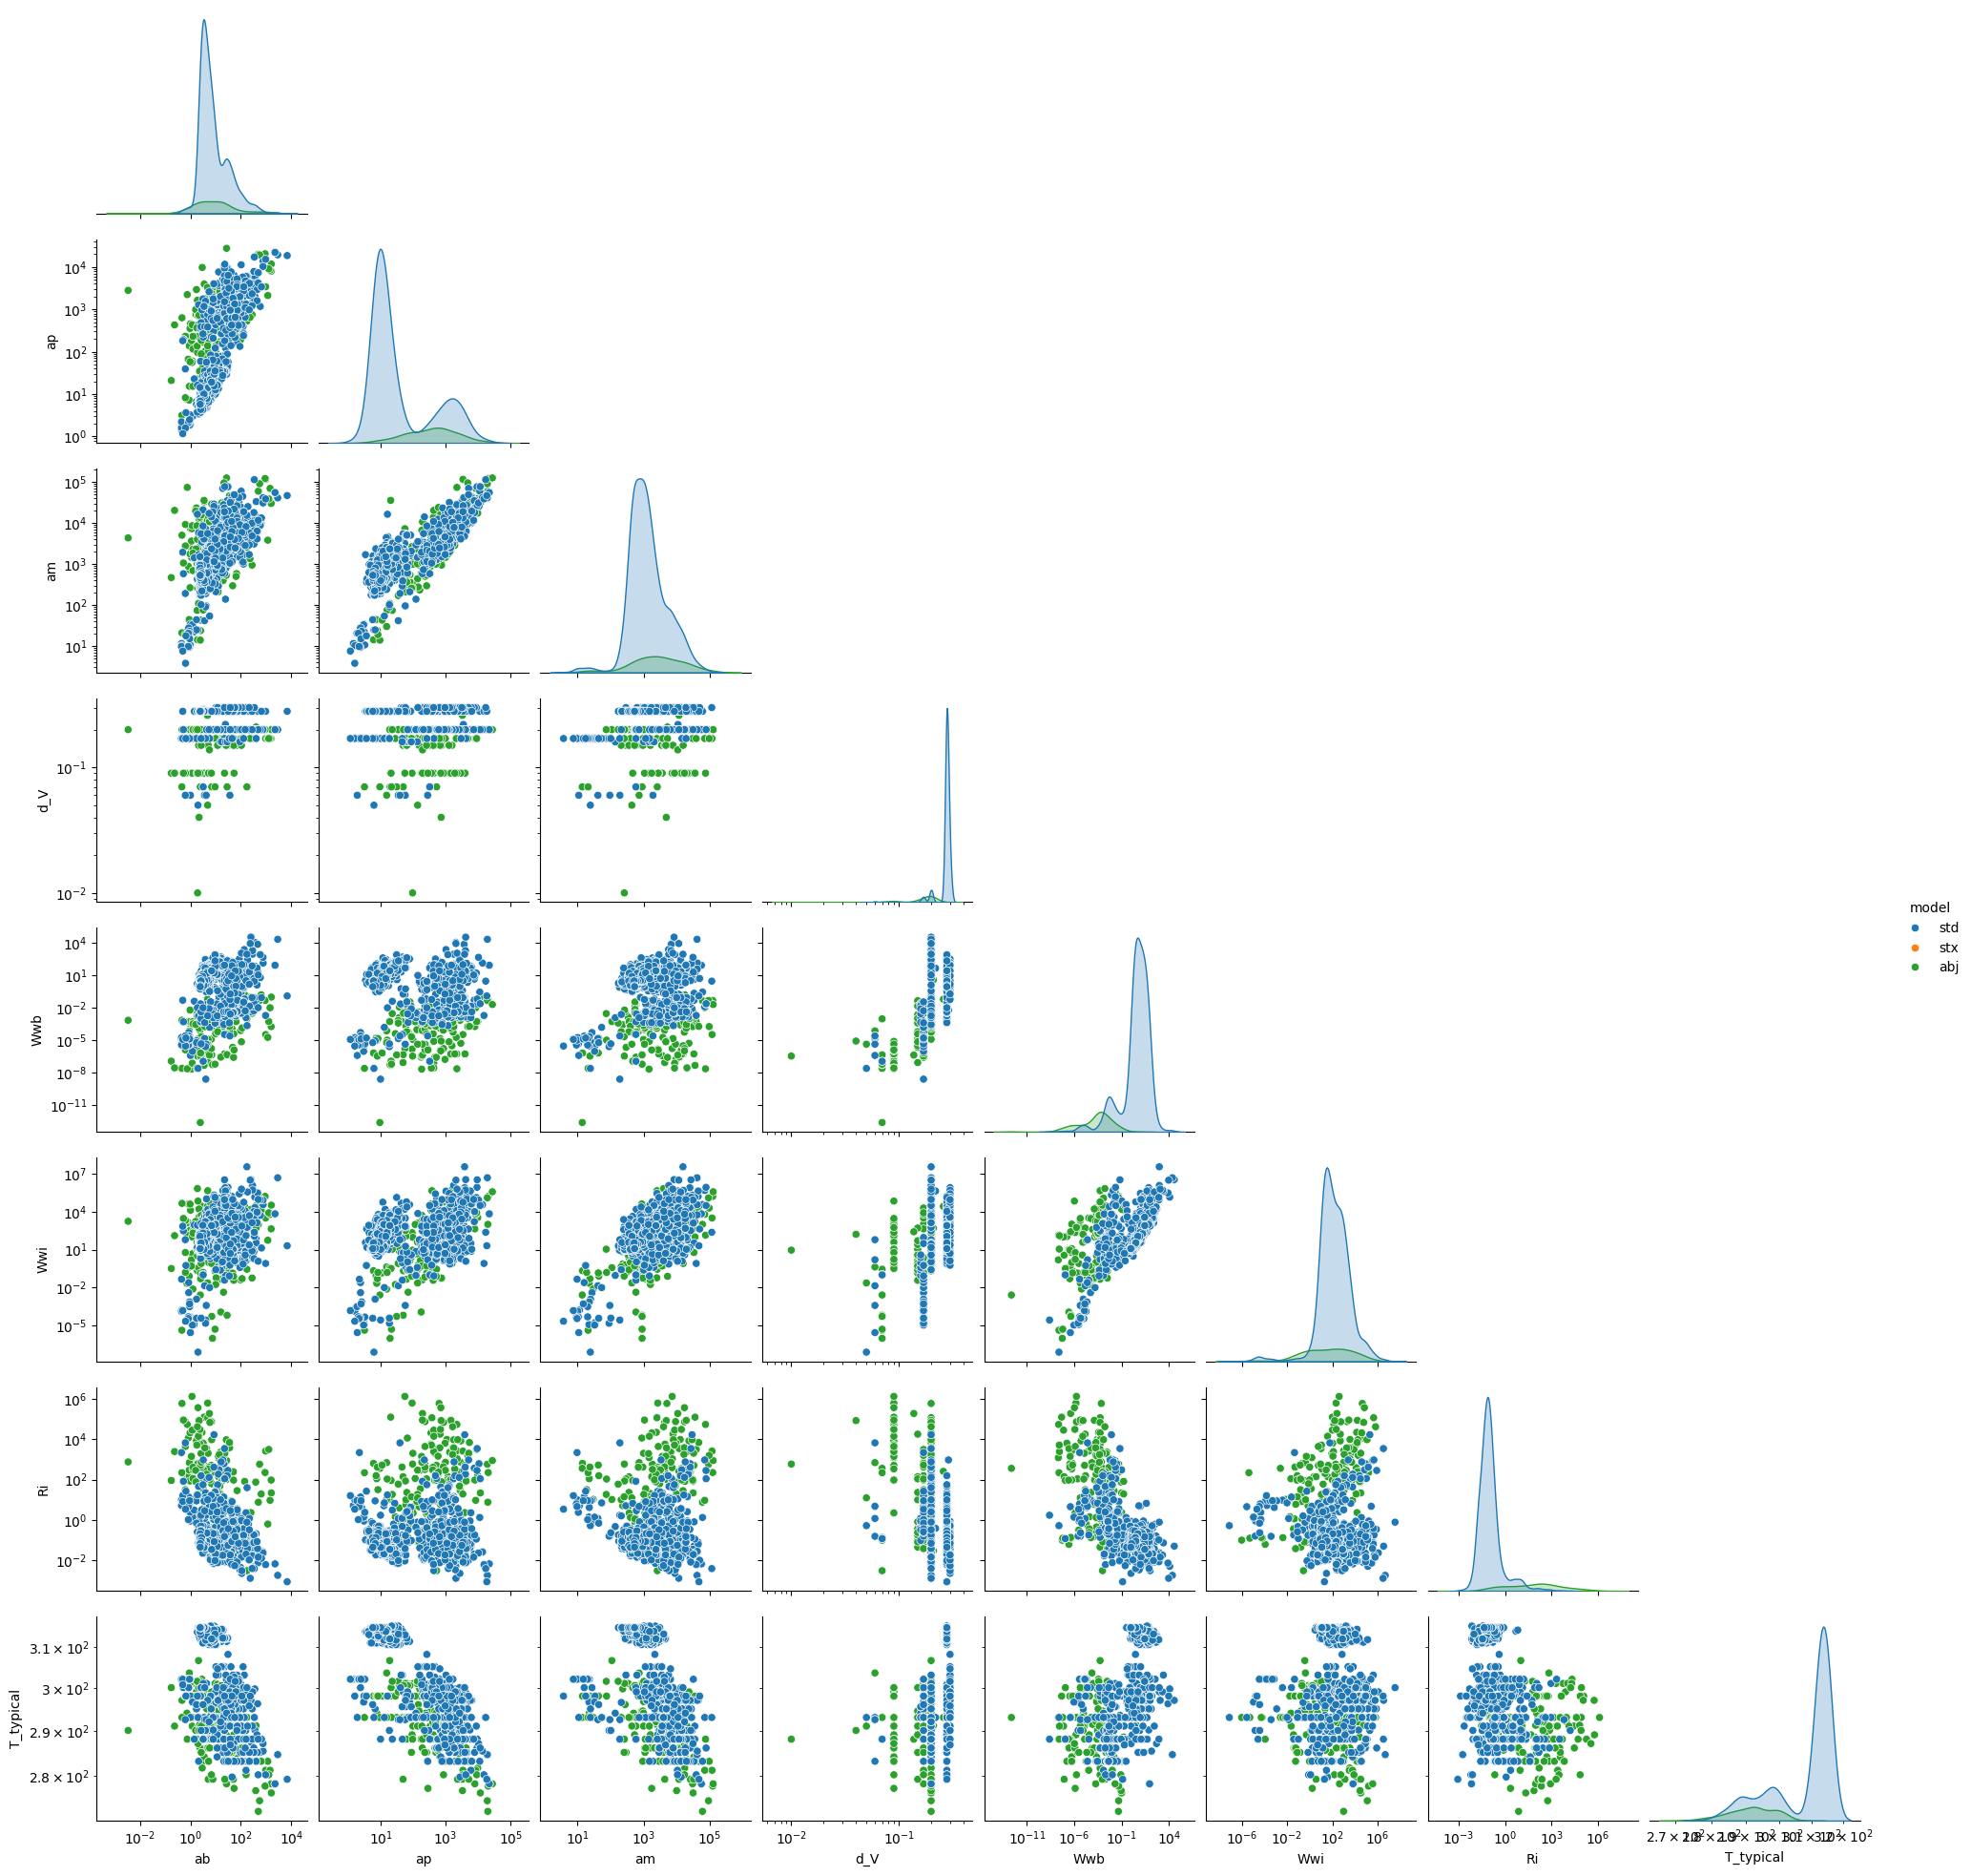

In [5]:
input_numerical_cols = col_types['input']['all'][:-2]
n_input_cols = len(input_numerical_cols)
g = sns.pairplot(data=df, vars=input_numerical_cols, corner=True, hue='model', hue_order=['std', 'stx', 'abj'],
                diag_kws={'log_scale':True},
                )
for i in range(n_input_cols):
    x_col = input_numerical_cols[i]
    for j in range(n_input_cols):
        y_col = input_numerical_cols[j]
        ax = g.axes[i, j]
        if ax is not None:
            if x_col in col_types['input']['log']:
                ax.set_xscale('log')
            if y_col in col_types['input']['log']:
                ax.set_yscale('log')

# Output visualization

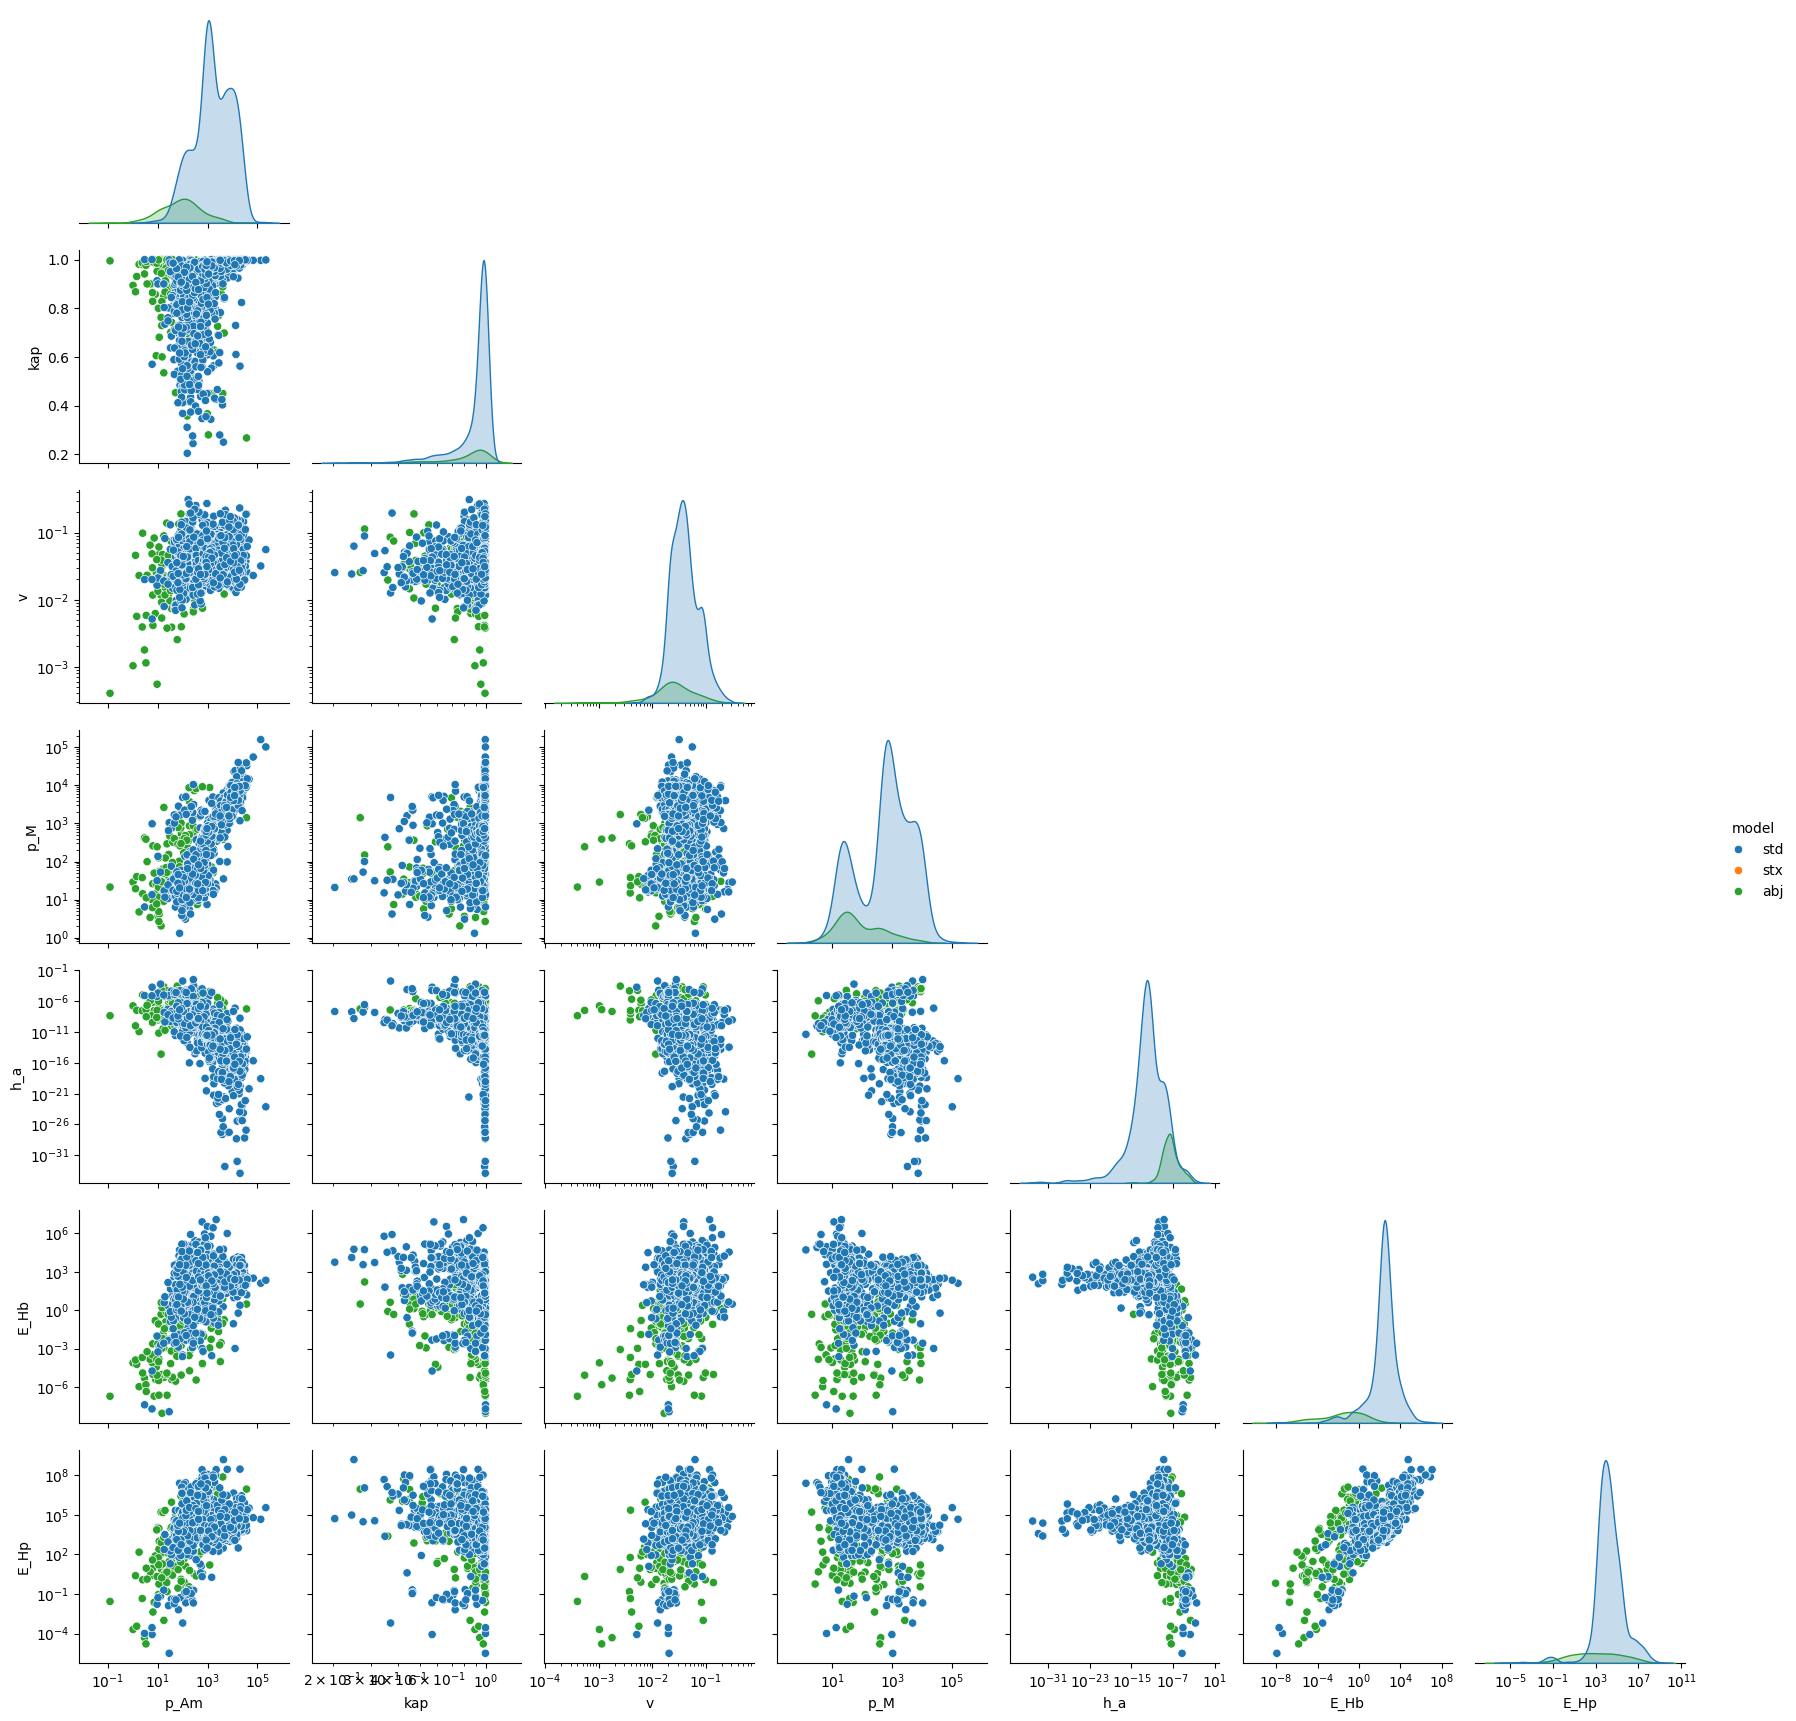

In [6]:
output_numerical_cols = col_types['output']['all']
n_output_cols = len(output_numerical_cols)
g = sns.pairplot(data=df, vars=output_numerical_cols, corner=True, hue='model', hue_order=['std', 'stx', 'abj'],
                diag_kws={'log_scale':True},
                )
for i in range(n_output_cols):
    x_col = output_numerical_cols[i]
    for j in range(n_output_cols):
        y_col = output_numerical_cols[j]
        ax = g.axes[i, j]
        if ax is not None:
            if x_col in col_types['output']['log']:
                ax.set_xscale('log')
            else:
                ax.set_xscale('linear')
            if y_col in col_types['output']['log']:
                ax.set_yscale('log')
            else:
                ax.set_yscale('linear')

In [7]:
(~df[output_numerical_cols].isna()).sum()

p_Am    1549
kap     1549
v       1549
p_M     1549
h_a     1549
E_Hb    1549
E_Hp    1549
dtype: int64

# Data and Parameter correlations

<Axes: >

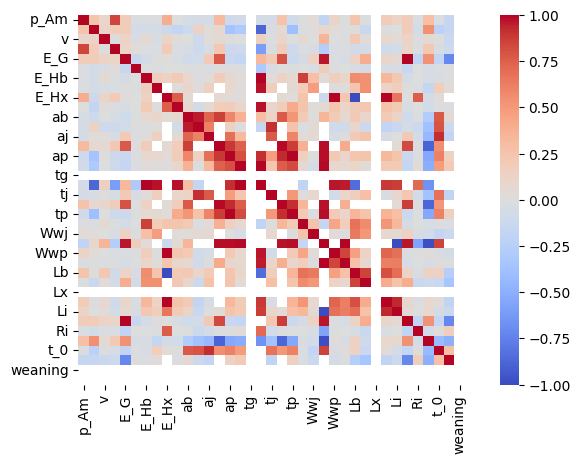

In [8]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm')

In [9]:
def compute_correlation(col1, col2):
    if col1 in col_types['output']['log'] or col1 in col_types['input']['log']:
        col1_series = df[col1].apply(np.log)
    else:
        col1_series = df[col1]
    if col2 in col_types['output']['log'] or col2 in col_types['input']['log']:
        col2_series = df[col2].apply(np.log)
    else:
        col2_series = df[col2]
    return col1_series.corr(col2_series)

In [10]:
def plot_input_vs_par(par):
    n_cols = 4
    n_rows = n_input_cols // n_cols + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 13), tight_layout=True)
    sns.despine(fig=fig)
    c = 0
    for i in range(n_rows):
        for j in range(n_cols):
            ax = axes[i, j]
            if c < n_input_cols:
                data_col = input_numerical_cols[c]
                sns.scatterplot(data=df, x=data_col, y=par, hue='model', hue_order=['std', 'stx', 'abj'], ax=ax, legend=False)
                c += 1
                if j > 0:
                    ax.set_ylabel('')
                    ax.set_yticks([])
                if par in col_types['output']['log']:
                    ax.set_yscale('log')
                if data_col in col_types['input']['log']:
                    ax.set_xscale('log')
                ax.set_title(f"Correlation: {compute_correlation(par, data_col):.4f}")
            else:
                ax.remove()

par_selector = widgets.Dropdown(options=output_numerical_cols, value=output_numerical_cols[0], description='Parameter:')
widgets.interactive(plot_input_vs_par, par=par_selector)

interactive(children=(Dropdown(description='Parameter:', options=('p_Am', 'kap', 'v', 'p_M', 'h_a', 'E_Hb', 'E…

# Taxonomy distribution

In [11]:
df

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,Lp,Li,d_V,Ri,T_typical,t_0,model,metamorphosis,weaning,foetus
species,,,,,,,,,,,,,,,,,,,,,
Abramis_brama,401.09210,0.66367,0.016416,23.3484,5228.964,4.116000e-08,5.484000e-01,0.548500,NaN,236600.0000,...,27.00,72.0,0.20,2271.399000,291.15,NaN,abj,True,False,False
Achoerodus_viridis,148.17940,0.52154,0.099329,5.6975,5238.883,2.801000e-10,3.065000e-01,0.306600,NaN,310500.0000,...,20.00,72.0,0.20,9589.041000,293.15,NaN,abj,True,False,False
Actinonaias_ligamentina,35.95064,0.98335,0.003881,14.8638,2354.299,9.080000e-10,3.811000e-06,0.000009,NaN,57.6300,...,5.85,18.4,0.09,2663.704000,288.15,7.9854,abj,True,False,False
Aegopinella_epipedostoma,27.32214,0.96917,0.012099,154.0150,3917.341,2.736000e-07,5.540000e-02,1.641000,NaN,23.0500,...,NaN,1.1,0.15,0.045428,294.65,0.0000,abj,True,False,False
Aequipecten_opercularis,14.74086,0.99997,0.016669,38.7875,2347.980,3.605000e-08,9.004000e-09,0.000012,NaN,0.6447,...,NaN,9.0,0.09,6270.305000,283.15,NaN,abj,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,1090.39500,0.94062,0.042551,592.3464,7318.401,2.015000e-12,4.647000e+02,NaN,2324.0,5827.0000,...,NaN,NaN,0.28,0.135166,314.75,NaN,std,False,False,False
Zonotrichia_querula,1476.81700,0.97417,0.041453,834.8830,7333.113,3.237000e-12,1.888000e+02,NaN,817.4,2151.0000,...,NaN,NaN,0.28,0.090110,314.75,NaN,std,False,False,False
Zootoca_vivipara,516.24300,0.72515,0.023765,344.4866,7837.059,1.533000e-07,2.264000e+02,NaN,NaN,6375.0000,...,5.00,7.0,0.30,0.018635,286.85,NaN,std,False,False,False


In [12]:
48 / len(df)

0.030987734021949646

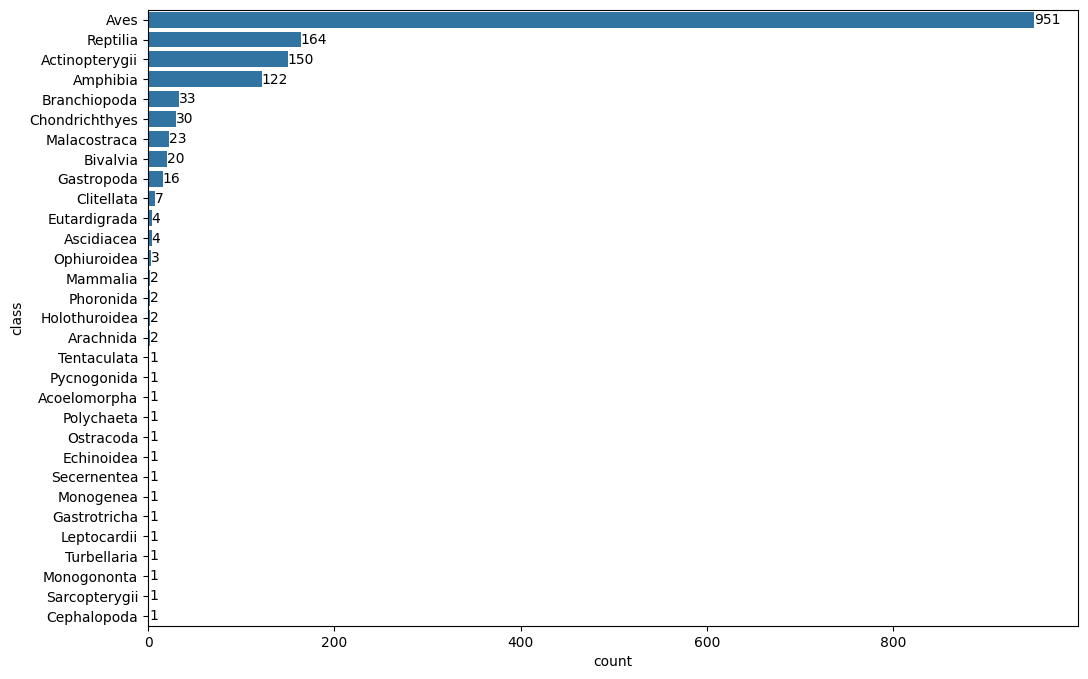

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(data=df['class'].value_counts(), ax=ax, orient='h')
ax.bar_label(ax.containers[0], fontsize=10);

# Ecocodes distribution

## Climate

In [14]:
climate_df = pd.DataFrame(False, index=df.index, columns=['A', 'B', 'C', 'D', 'E', 'M'], dtype='bool')
for species, climate_eco_codes in df['climate'].items():
    for l in climate_df.columns:
        if l in climate_eco_codes:
            climate_df.loc[species, l] = True
climate_df['eco_codes'] = df['climate']
climate_df

,A,B,C,D,E,M,eco_codes
species,,,,,,,
Abramis_brama,False,False,True,True,False,False,Cfb Dfb
Achoerodus_viridis,False,True,False,False,False,True,MB
Actinonaias_ligamentina,False,False,True,True,False,False,Cfa Dfa
Aegopinella_epipedostoma,False,False,False,True,False,False,Dfb
Aequipecten_opercularis,False,False,True,False,False,True,MC
...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,False,True,False,True,False,False,BSk Dfa Dfb Dfc
Zonotrichia_querula,False,False,False,True,False,False,Dfc
Zootoca_vivipara,False,True,True,True,False,False,Cfb Dfb BWk BSk


Text(0, 0.5, 'Nº of species')

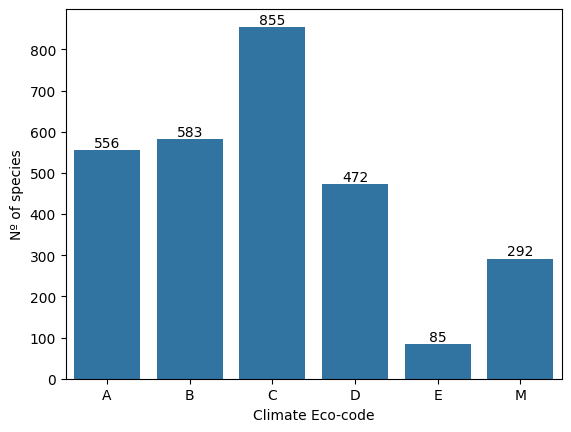

In [15]:
ax = sns.barplot(data=climate_df.sum(numeric_only=True))
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel('Climate Eco-code')
ax.set_ylabel('Nº of species')

In [16]:
df[['climate_' + c for c in climate_df.columns[:-1]]] = climate_df.drop(columns=['eco_codes'])
df

,p_Am,kap,v,p_M,E_G,h_a,E_Hb,E_Hj,E_Hx,E_Hp,...,model,metamorphosis,weaning,foetus,climate_A,climate_B,climate_C,climate_D,climate_E,climate_M
species,,,,,,,,,,,,,,,,,,,,,
Abramis_brama,401.09210,0.66367,0.016416,23.3484,5228.964,4.116000e-08,5.484000e-01,0.548500,NaN,236600.0000,...,abj,True,False,False,False,False,True,True,False,False
Achoerodus_viridis,148.17940,0.52154,0.099329,5.6975,5238.883,2.801000e-10,3.065000e-01,0.306600,NaN,310500.0000,...,abj,True,False,False,False,True,False,False,False,True
Actinonaias_ligamentina,35.95064,0.98335,0.003881,14.8638,2354.299,9.080000e-10,3.811000e-06,0.000009,NaN,57.6300,...,abj,True,False,False,False,False,True,True,False,False
Aegopinella_epipedostoma,27.32214,0.96917,0.012099,154.0150,3917.341,2.736000e-07,5.540000e-02,1.641000,NaN,23.0500,...,abj,True,False,False,False,False,False,True,False,False
Aequipecten_opercularis,14.74086,0.99997,0.016669,38.7875,2347.980,3.605000e-08,9.004000e-09,0.000012,NaN,0.6447,...,abj,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,1090.39500,0.94062,0.042551,592.3464,7318.401,2.015000e-12,4.647000e+02,NaN,2324.0,5827.0000,...,std,False,False,False,False,True,False,True,False,False
Zonotrichia_querula,1476.81700,0.97417,0.041453,834.8830,7333.113,3.237000e-12,1.888000e+02,NaN,817.4,2151.0000,...,std,False,False,False,False,False,False,True,False,False
Zootoca_vivipara,516.24300,0.72515,0.023765,344.4866,7837.059,1.533000e-07,2.264000e+02,NaN,NaN,6375.0000,...,std,False,False,False,False,True,True,True,False,False


## Ecozone

Not relevant

## Habitat

In [17]:
habitat_df = pd.DataFrame(False, index=df.index, columns=['T', 'F', 'S', 'M'], dtype='bool')
for species, habitat_eco_codes in df['habitat'].items():
    for h in habitat_df.columns:
        if h in habitat_eco_codes:
            habitat_df.loc[species, h] = True
habitat_df['eco_codes'] = df['habitat']
habitat_df

,T,F,S,M,eco_codes
species,,,,,
Abramis_brama,False,True,False,False,0iFr 0iFl
Achoerodus_viridis,False,False,False,True,0jMp jiMr
Actinonaias_ligamentina,False,True,False,False,0jFp jiFr jiFl
Aegopinella_epipedostoma,True,False,False,False,0iTf
Aequipecten_opercularis,False,False,False,True,0jMp jiMb
...,...,...,...,...,...
Zonotrichia_leucophrys,True,False,False,False,0iTh 0iTi 0iTs
Zonotrichia_querula,True,False,False,False,0iTh 0iTi 0iTs
Zootoca_vivipara,True,False,False,False,0iThh 0iTg


Text(0, 0.5, 'Nº of species')

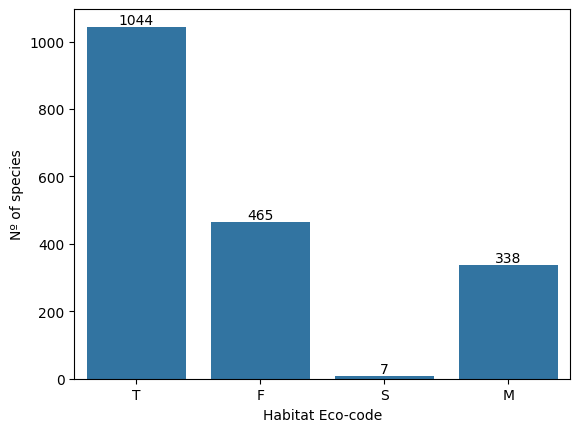

In [18]:
ax = sns.barplot(data=habitat_df.sum(numeric_only=True))
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel('Habitat Eco-code')
ax.set_ylabel('Nº of species')

## Embryo

Not relevant

## Migrate

In [19]:
migrate_df = pd.DataFrame(False, index=df.index, columns=['TT', 'TW', 'Mo', 'Mp', 'Ma', 'Md', 'Ms', 'MI', 'No'], dtype='bool')
for species, migrate_eco_codes in df['migrate'].items():
    if pd.isna(migrate_eco_codes):
        migrate_df.loc[species, 'No'] = True
        continue
    for h in migrate_df.columns:
        if h in migrate_eco_codes:
            migrate_df.loc[species, h] = True
migrate_df['eco_codes'] = df['migrate']
migrate_df

,TT,TW,Mo,Mp,Ma,Md,Ms,MI,No,eco_codes
species,,,,,,,,,,
Abramis_brama,False,False,False,True,False,False,False,False,False,Mp
Achoerodus_viridis,False,False,False,False,False,False,False,False,True,NaN
Actinonaias_ligamentina,False,False,False,False,False,False,False,False,True,NaN
Aegopinella_epipedostoma,False,False,False,False,False,False,False,False,True,NaN
Aequipecten_opercularis,False,False,False,False,False,False,False,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,False,False,False,False,False,False,False,False,False,Ml
Zonotrichia_querula,False,False,False,False,False,False,False,False,False,Ml
Zootoca_vivipara,False,False,False,False,False,False,False,False,True,NaN


Text(0, 0.5, 'Nº of species')

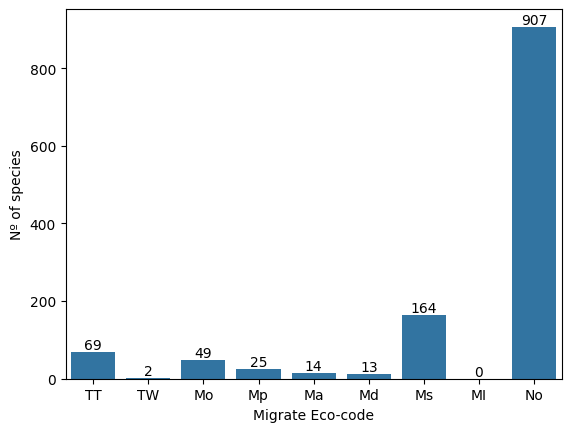

In [20]:
ax = sns.barplot(data=migrate_df.sum(numeric_only=True))
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel('Migrate Eco-code')
ax.set_ylabel('Nº of species')

## Food

In [21]:
food_df = pd.DataFrame(False, index=df.index, columns=['A', 'D', 'B', 'P', 'O', 'H', 'F', 'C', 'M', 'E', 'S', 'T'], dtype='bool')
for species, food_eco_codes in df['food'].items():
    for f in food_df.columns:
        if f in food_eco_codes:
            food_df.loc[species, f] = True
food_df['eco_codes'] = df['food']
food_df

,A,D,B,P,O,H,F,C,M,E,S,T,eco_codes
species,,,,,,,,,,,,,
Abramis_brama,False,False,False,False,False,True,False,True,False,False,False,False,biCi biHl
Achoerodus_viridis,False,False,False,True,False,False,False,True,False,False,False,False,bjPz jiCi jiCvf
Actinonaias_ligamentina,False,False,False,True,False,False,False,False,False,False,False,True,bjTvf jiPp
Aegopinella_epipedostoma,False,False,False,False,False,False,False,True,False,False,True,False,biCi biSi
Aequipecten_opercularis,False,False,False,True,False,False,False,False,False,False,False,False,biPp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,False,False,False,False,False,True,False,True,False,False,False,False,biCi biHs
Zonotrichia_querula,False,False,False,False,False,True,False,True,False,False,False,False,biCi biHs
Zootoca_vivipara,False,False,False,False,False,False,False,True,False,False,False,False,biCii


Text(0, 0.5, 'Nº of species')

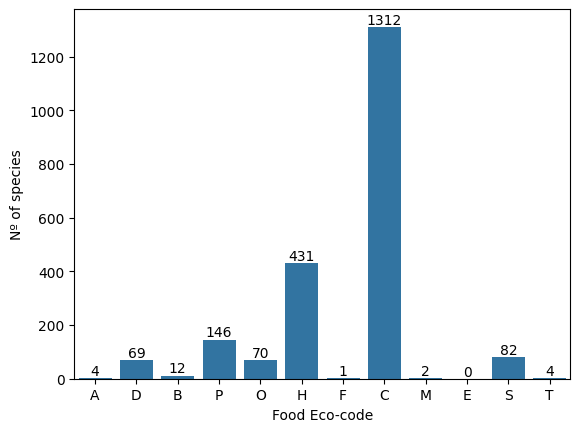

In [22]:
ax = sns.barplot(data=food_df.sum(numeric_only=True))
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel('Food Eco-code')
ax.set_ylabel('Nº of species')

## Gender

Not relevant

## Reprod

In [23]:
reprod_df = pd.DataFrame(False, index=df.index, columns=['O', 'Apf', 'Apa', 'Apo', 'Ob', 'Os'], dtype='bool')
for species, reprod_eco_codes in df['reprod'].items():
    for h in reprod_df.columns:
        if h in reprod_eco_codes:
            reprod_df.loc[species, h] = True
reprod_df['eco_codes'] = df['reprod']
reprod_df

,O,Apf,Apa,Apo,Ob,Os,eco_codes
species,,,,,,,
Abramis_brama,True,False,False,False,False,False,O
Achoerodus_viridis,True,False,False,False,False,False,O
Actinonaias_ligamentina,True,False,False,False,False,False,O
Aegopinella_epipedostoma,True,False,False,False,False,False,O
Aequipecten_opercularis,True,False,False,False,False,False,O
...,...,...,...,...,...,...,...
Zonotrichia_leucophrys,True,False,False,False,False,False,O
Zonotrichia_querula,True,False,False,False,False,False,O
Zootoca_vivipara,True,False,False,False,False,False,O


Text(0, 0.5, 'Nº of species')

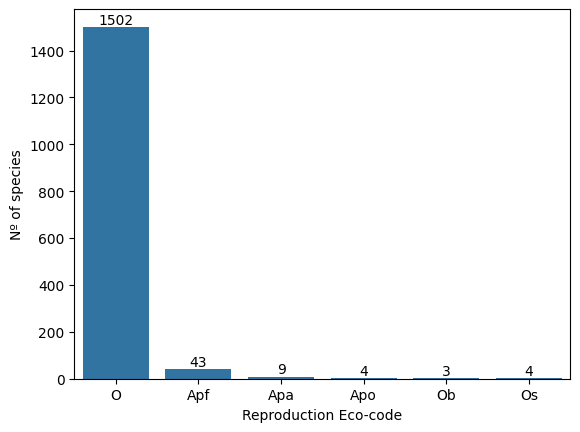

In [24]:
ax = sns.barplot(data=reprod_df.sum(numeric_only=True))
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlabel('Reproduction Eco-code')
ax.set_ylabel('Nº of species')